In [76]:
import numpy as np
import matplotlib.pyplot as plt

$$
u'' - 2u' - u=-2xe^{x}
$$
$$
u(0)=0 
$$
$$
u(1)=e 
$$
$$
u(x) = xe^x
$$

In [77]:
a, b = 0, 1
N = 5

In [78]:
h = (b - a) / N
x_nodes = np.linspace(a, b, N + 1)

In [79]:
def p(x): return -2
def q(x): return -1
def f(x): return -2 * x * np.exp(x)

In [80]:
A = np.zeros((N + 1, N + 1))
rhs = np.zeros(N + 1)

In [81]:
for i in range(1, N):
    A[i, i - 1] = 1 / h ** 2 - p(x_nodes[i]) / (2 * h)
    A[i, i] = -2 / h ** 2 + q(x_nodes[i])
    A[i, i + 1] = 1 / h ** 2 + p(x_nodes[i]) / (2 * h)
    rhs[i] = f(x_nodes[i])

In [82]:
A[0, 0] = 1
rhs[0] = 0  
A[N, N] = 1
rhs[N] = np.e  

In [83]:
u_values = np.linalg.solve(A, rhs)

B = np.zeros((N + 1, N + 1))
moments_rhs = np.zeros(N + 1)

for i in range(1, N):
    B[i, i-1] = 1
    B[i, i] = 4
    B[i, i+1] = 1
    moments_rhs[i] = 6/h**2 * (u_values[i-1] - 2*u_values[i] + u_values[i+1])

u_prime_0 = (u_values[1] - u_values[0]) / h
B[0, 0] = 1
moments_rhs[0] = p(a) * u_prime_0 + q(a) * u_values[0] + f(a)

u_prime_1 = (u_values[-1] - u_values[-2]) / h
B[N, N] = 1
moments_rhs[N] = p(b) * u_prime_1 + q(b) * u_values[-1] + f(b)

M = np.linalg.solve(B, moments_rhs)

In [84]:
def compute_spline_coeffs(u_values, M, h):
    a = u_values[:-1]
    b = (u_values[1:] - u_values[:-1]) / h - h * (2 * M[:-1] + M[1:]) / 6
    c = M[:-1] / 2
    d = (M[1:] - M[:-1]) / (6 * h)
    return a, b, c, d

In [85]:
a_coeff, b_coeff, c_coeff, d_coeff = compute_spline_coeffs(u_values, M, h)

In [86]:
def cubic_spline(x, x_nodes, a, b, c, d):
    i = np.searchsorted(x_nodes, x) - 1
    i = min(max(i, 0), len(x_nodes)-2)
    dx = x - x_nodes[i]
    return a[i] + b[i] * dx + c[i] * dx ** 2 + d[i] * dx ** 3

def exact_solution(x):
    return x * np.exp(x)

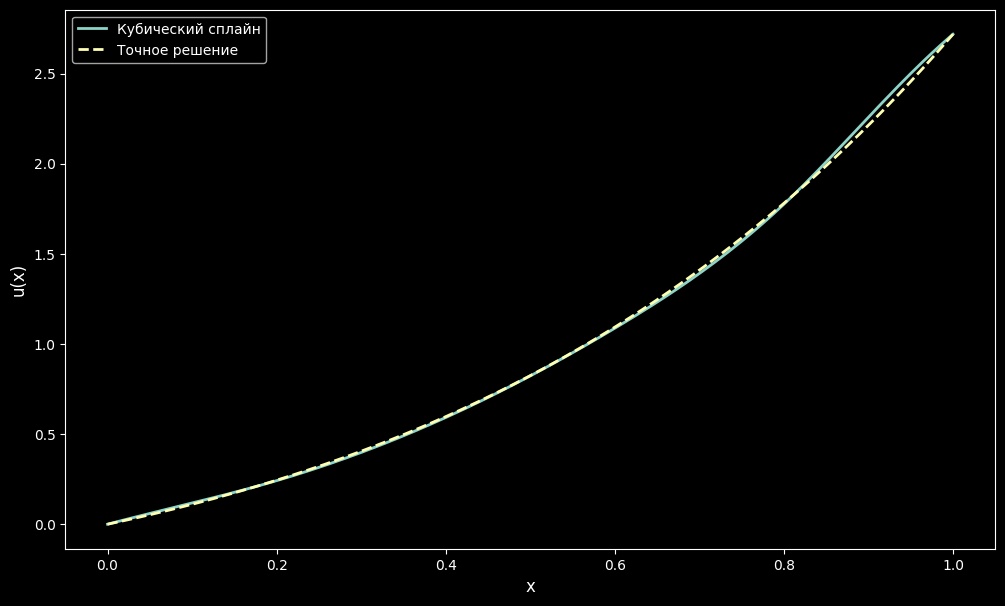

In [87]:
x_plot = np.linspace(a, b, 200)
spline_values = [cubic_spline(x, x_nodes, a_coeff, b_coeff, c_coeff, d_coeff) for x in x_plot]
exact_values = [exact_solution(x) for x in x_plot]

plt.figure(figsize=(12, 7))

plt.plot(x_plot, spline_values, label="Кубический сплайн", linewidth=2)
plt.plot(x_plot, exact_values, '--', label="Точное решение", linewidth=2)

plt.xlabel('x', fontsize=12)
plt.ylabel('u(x)', fontsize=12)

plt.legend()

plt.show()